# Постановка задачи

Задача: численно решить двумерную систему уравнений мелкой воды, следующего вида:

\begin{equation*}
 \begin{cases}
   \frac{\partial u}{\partial t} = -u \frac{\partial u}{\partial x} - v \frac{\partial u}{\partial y} - g \frac{\partial h}{\partial x} + fv\\
   \frac{\partial v}{\partial t} = -u \frac{\partial v}{\partial x} - v \frac{\partial v}{\partial y} - g \frac{\partial h}{\partial y} - fu\\
   \frac{\partial h}{\partial t} = - \frac{\partial (hu)}{\partial x} -  \frac{\partial (hv)}{\partial y}
 \end{cases}
\end{equation*}

Где $u, v$ - компоненты вектора скорости, $h$ - высота уровня жидкости, $g = 9.8$ - ускорение свободного падения, $f = 2 \cdot 7.292 \cdot 10^{-5}$ - параметр Кориолиса.

Расчетная область - бипериодический квадрат (тор) размера $[0, 2 \pi a] \times [0, 2 \pi a]$, где $a = 6371.22 \cdot 10^3$ - радиус Земли.

Для тестов, возьмем для начала стационарное решение (геострофическое равновесие), поле скорости следующего вида

$$u(x, y) = A_x (cos(x)cos(y) - sin(x)sin(y))$$
$$v(x, y) = A_y (-cos(x)cos(y) + sin(x)sin(y))$$

Затем проверим что такие поля дают стационарное решение:

$$u(x, y) = \frac{\sqrt{2}}{2} u0 \left(cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) - sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right)$$

$$v(x, y) = \frac{\sqrt{2}}{2} u0 \left( -cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) + sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right)$$

$$h = h_{mean} - \frac{u0 \cdot f \cdot a}{g} \frac{\sqrt{2}}{2} \left(sin\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) + cos\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right)$$
Где $u0 = 50$, $h_{mean} = 10000$

# Дискретизация

Для начала, нужно привести систему уравнений к дискретному виду. Для этого, можно использовать конечно-разностный метод. Рассмотрим сначала конечно-разностный аналог уравнения неразрывности (уравнения для высоты уровня жидкости $h$):

$$\frac{\partial h}{\partial t} = - \frac{\partial (hu)}{\partial x} -  \frac{\partial (hv)}{\partial y}$$

Проводя аппроксимацию по пространству с помощью центральной разности второго порядка, получим:

$$\frac{h_{i,j}^{n+1} - h_{i,j}^{n}}{\Delta t} = - \frac{1}{2 \Delta x} [(h_{i+1,j}^{n} u_{i+1,j}^{n} - h_{i-1,j}^{n} u_{i-1,j}^{n}) + (h_{i,j+1}^{n} v_{i,j+1}^{n} - h_{i,j-1}^{n} v_{i,j-1}^{n})]$$

Разрешая относительно $h_{i,j}^{n+1}$, получим:

$$h_{i,j}^{n+1} = h_{i,j}^{n} - \frac{\Delta t}{2 \Delta x} [(h_{i+1,j}^{n} u_{i+1,j}^{n} - h_{i-1,j}^{n} u_{i-1,j}^{n}) + (h_{i,j+1}^{n} v_{i,j+1}^{n} - h_{i,j-1}^{n} v_{i,j-1}^{n})]$$

Теперь рассмотрим конечно-разностный аналог уравнений для компонентов вектора скорости $u$ и $v$:

$$\frac{\partial u}{\partial t} = -u \frac{\partial u}{\partial x} - v \frac{\partial u}{\partial y} - g \frac{\partial h}{\partial x} + fv$$

$$\frac{\partial v}{\partial t} = -u \frac{\partial v}{\partial x} - v \frac{\partial v}{\partial y} - g \frac{\partial h}{\partial y} - fu$$

Для компоненты $u$:
\begin{equation*}
    \frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta t} = -u_{i,j}^{n} \frac{u_{i+1,j}^{n} - u_{i-1,j}^{n}}{2\Delta x} - v_{i,j}^{n} \frac{u_{i,j+1}^{n} - u_{i,j-1}^{n}}{2\Delta y} - g \frac{h_{i+1,j}^{n} - h_{i-1,j}^{n}}{2\Delta x} + f v_{i,j}^{n}
\end{equation*}

Для компоненты $v$:
\begin{equation*}
    \frac{v_{i,j}^{n+1} - v_{i,j}^{n}}{\Delta t} = -u_{i,j}^{n} \frac{v_{i+1,j}^{n} - v_{i-1,j}^{n}}{2\Delta x} - v_{i,j}^{n} \frac{v_{i,j+1}^{n} - v_{i,j-1}^{n}}{2\Delta y} - g \frac{h_{i,j+1}^{n} - h_{i,j-1}^{n}}{2\Delta y} - f u_{i,j}^{n}
\end{equation*}

Здесь $u_{i,j}^n$, $v_{i,j}^n$ и $h_{i,j}^n$ - значения скорости по $x$ и $y$ и уровня в момент времени $t = n\Delta t$ в точке $(i\Delta x, j\Delta y)$, соответственно. $\Delta x$ и $\Delta y$ - шаги по $x$ и $y$ соответственно.

Итого получаем дискретную систему:

\begin{equation*}
 \begin{cases}
   \frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta t} = -u_{i,j}^{n} \frac{u_{i+1,j}^{n} - u_{i-1,j}^{n}}{2\Delta x} - v_{i,j}^{n} \frac{u_{i,j+1}^{n} - u_{i,j-1}^{n}}{2\Delta y} - g \frac{h_{i+1,j}^{n} - h_{i-1,j}^{n}}{2\Delta x} + f v_{i,j}^{n}\\
   \\
   \frac{v_{i,j}^{n+1} - v_{i,j}^{n}}{\Delta t} = -u_{i,j}^{n} \frac{v_{i+1,j}^{n} - v_{i-1,j}^{n}}{2\Delta x} - v_{i,j}^{n} \frac{v_{i,j+1}^{n} - v_{i,j-1}^{n}}{2\Delta y} - g \frac{h_{i,j+1}^{n} - h_{i,j-1}^{n}}{2\Delta y} - f u_{i,j}^{n}\\
   \\
    \frac{h_{i,j}^{n+1} - h_{i,j}^{n}}{\Delta t} = - \frac{1}{2 \Delta x} \left((h_{i+1,j}^{n} u_{i+1,j}^{n} - h_{i-1,j}^{n} u_{i-1,j}^{n}) + (h_{i,j+1}^{n} v_{i,j+1}^{n} - h_{i,j-1}^{n} v_{i,j-1}^{n})\right)
    \end{cases}
\end{equation*}

# Стационарное решение

Для того, чтобы проверить, что поля скорости заданные в условии дают стационарное решение, нужно подставить их в уравнения двумерной системы мелкой воды и убедиться, что частные производные по времени равны нулю:

$$\frac{\partial u}{\partial t} = 0, \frac{\partial v}{\partial t} = 0, \frac{\partial h}{\partial t} = 0$$

Распишем первое уравнение:

$$- \frac{\sqrt{2}}{2} u0 \left(cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) - sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right) \cdot \frac{\sqrt{2}}{2a} u0 \left(-sin\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) - cos\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right) - \frac{\sqrt{2}}{2} u0 \left( -cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) + sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right) \cdot \frac{\sqrt{2}}{2a} u0 \left(-cos\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right) - sin\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right)\right) + u0 \cdot f \cdot \frac{\sqrt{2}}{2} \left(cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) - sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right) + f \cdot \frac{\sqrt{2}}{2} u0 \left( -cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) + sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right)$$

Сократим и упростим:

$$\frac{u0^2}{2a} \cdot cos\left(\frac{x+y}{a}\right) \cdot sin\left(\frac{x+y}{a}\right) - \frac{u0^2}{2a} \cdot cos\left(\frac{x+y}{a}\right) \cdot sin\left(\frac{x+y}{a}\right) + u0 \cdot f \cdot \frac{\sqrt{2}}{2} cos\left(\frac{x+y}{a}\right) - f \cdot \frac{\sqrt{2}}{2} u0 \cdot cos\left(\frac{x+y}{a}\right) = 0$$

Аналогично получается и для остальных уравнений

Итого, если мы подставим выражения для $u(x,y)$, $v(x,y)$ и $h(x,y)$ в уравнения системы мелкой воды, то получим:

$$0 = -u \frac{\partial u}{\partial x} - v \frac{\partial u}{\partial y} - g \frac{\partial h}{\partial x} + fv$$

$$0 = -u \frac{\partial v}{\partial x} - v \frac{\partial v}{\partial y} - g \frac{\partial h}{\partial y} - fu$$

$$0 = - \frac{\partial (hu)}{\partial x} -  \frac{\partial (hv)}{\partial y}$$

что доказывает, что скорости $u(x,y)$ и $v(x,y)$ вместе с высотой $h(x,y)$ являются стационарным решением двумерной системы мелкой воды.

In [2]:
import numpy as np

In [3]:
# Задаем начальные и граничные условия
nx = 20
ny = 20
u = np.zeros((nx, ny))
v = np.zeros((nx, ny))
h = np.zeros((nx, ny))
h[0,:] = 1
h[-1,:] = 1
h[:,0] = 1
h[:,-1] = 1

# Задаем шаги
dt = 0.01
dx = 1 / nx
dy = 1 / ny

# Задаем константы
a = 6371.22e3 # Радиус Земли
g = 9.8 # Ускорение свободного падения
f = 2 * 7.292e-5 # Параметр Кориолиса
u0 = 50 # Амплитуда скорости
h_mean = 10000 # Средняя высота уровня жидкости
L = 2 * np.pi * a # Размер расчетной области 

In [4]:
# Вычисляем значения неизвестных функций на следующем временном шаге
for n in range(10):
    un = u.copy()
    vn = v.copy()
    hn = h.copy()

    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = (un[i,j] - un[i,j]*dt/dx*(un[i,j+1]-un[i,j-1])/2 - vn[i,j]*dt/dy*(un[i+1,j]-un[i-1,j])/2 - g*dt/dx*(hn[i+1,j]-hn[i-1,j])/2 + f*dt*vn[i,j])
            v[i,j] = (vn[i,j] - un[i,j]*dt/dx*(vn[i,j+1]-vn[i,j-1])/2 - vn[i,j]*dt/dy*(vn[i+1,j]-vn[i-1,j])/2 - g*dt/dy*(hn[i,j+1]-hn[i,j-1])/2 - f*dt*un[i,j])
            h[i,j] = (hn[i,j] - dt/(2*dx)*((hn[i+1,j]*un[i+1,j]-hn[i-1,j]*un[i-1,j])+(hn[i,j+1]*vn[i,j+1]-hn[i,j-1]*vn[i,j-1])))

# Выводим результаты
#print(u)
#print(v)
#print(h)

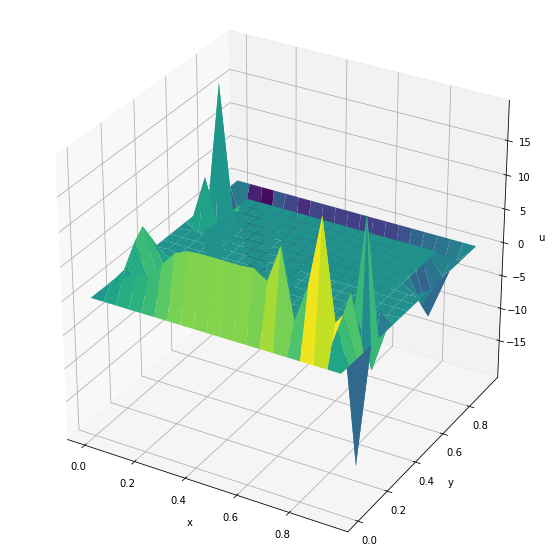

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создание сетки для построения графиков
x = np.arange(0, 1, dx)
y = np.arange(0, 1, dy)
#print(x)
X, Y = np.meshgrid(x, y)

# Построение графика для переменной u
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_box_aspect([1,1,1])
plt.show()

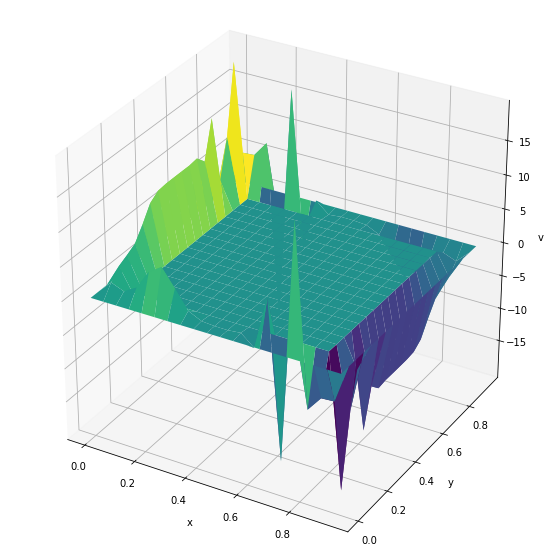

In [6]:
# Построение графика для переменной v
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, v, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('v')
ax.set_box_aspect([1,1,1])
plt.show()

In [7]:
#Стационарное решение
def u(x, y):
    return np.sqrt(2)/2 * u0 * (np.cos(x/a)*np.cos(y/a) - np.sin(x/a)*np.sin(y/a))

def v(x, y):
    return np.sqrt(2)/2 * u0 * (-np.cos(x/a)*np.cos(y/a) + np.sin(x/a)*np.sin(y/a))

def h(x, y):
    return h_mean - (u0*f*a/g)*np.sqrt(2)/2 * (np.sin(x/a)*np.cos(y/a) + np.cos(x/a)*np.sin(y/a))

In [8]:
u_values = u(X, Y)
v_values = v(X, Y)
h_values = h(X, Y)

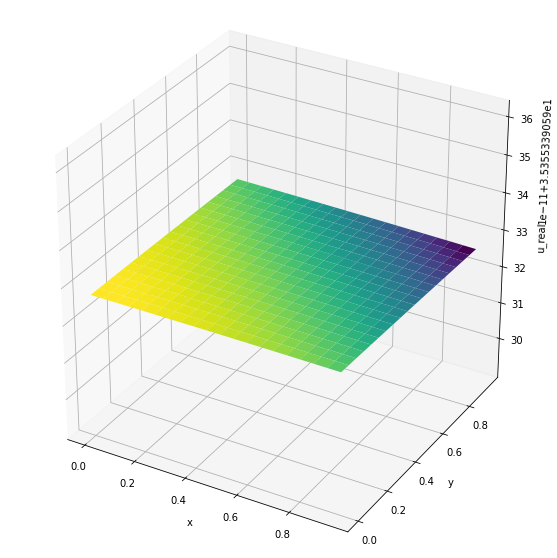

In [9]:
# Построение графика для переменной u
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u_values, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u_real')
ax.set_box_aspect([1,1,1])
plt.show()

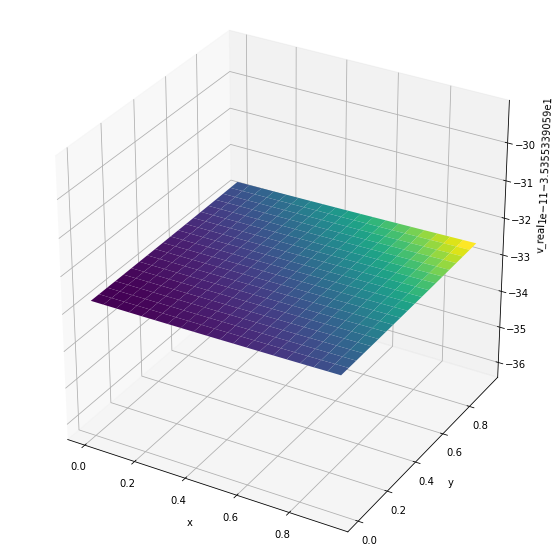

In [10]:
# Построение графика для переменной v
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, v_values, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('v_real')
ax.set_box_aspect([1,1,1])
plt.show()